# Analysis of Bitly URL posts of Partisan Facebook pages 

In [1]:
import pandas
import pandas as pd
import numpy as np
import operator
import glob
from os.path import expanduser as ospath
from urlparse import urlparse
import os
import requests
from requests_toolbelt.utils import dump
import unicodedata
import facebook
from collections import Counter
import json


bitly_dir = 'bitly_cumulative_stats/'
dir_pattern = os.path.join(bitly_dir, '*')
bitly_sub_dir_list = glob.glob(dir_pattern)

status_dir = 'data/statuses'
csv_pattern = os.path.join(status_dir,'*.csv')
status_file_list = glob.glob(csv_pattern)


In [2]:
len(bitly_sub_dir_list)

229

In [3]:
status_file_list[0]

'data/statuses/100434040001314_facebook_statuses.csv'

In [4]:
bitly_status_dict = {}
for each_file in status_file_list:
    for each_dir in bitly_sub_dir_list:
        if str(each_dir.split("/")[1]) in each_file:
            bitly_status_dict[each_dir] = each_file

In [6]:
total_files = 0

for each_dir in bitly_sub_dir_list:
    json_pattern = os.path.join(each_dir, '*.json')
    file_list = glob.glob(json_pattern)
    #print len(file_list)
    total_files += len(file_list)

In [247]:
total_files

27379

In [180]:
json_pattern = os.path.join('bitly_cumulative_stats/102838533577', '*.json')
file_list = glob.glob(json_pattern)
file_list[0]

'bitly_cumulative_stats/102838533577/bit.ly_1dMtfRv_48.json'

In [ ]:
num_reactions = 0
for each_link in list(df['status_link']):
    print each_link
    if 'http://bit.ly/1dMtfRv' == each_link:
        r_list = df[df['status_link'] == each_link]['num_reactions'].values.astype(int)
        print True
np.sum(r_list)

In [334]:
bitly_clicks_dict = {}
for each_dir, each_status in bitly_status_dict.items():
    json_pattern = os.path.join(each_dir, '*.json')
    bitly_file_list = glob.glob(json_pattern)
    for each_file in bitly_file_list:
        short_url_string = each_file.split("/")[2][0:14]
        short_url = 'http://'+short_url_string.split("_")[0] +"/"+short_url_string.split("_")[1]
        bitly_clicks_dict[short_url] = {'clicks': None, 'num_reactions':None, 'fan_count': None, 'page_name': None}
        

In [294]:
fb_df = pandas.read_csv('data/Fb_Pages.csv')

In [336]:

for each_dir, each_status in bitly_status_dict.items():
    json_pattern = os.path.join(each_dir, '*.json')
    bitly_file_list = glob.glob(json_pattern)
    df = pandas.read_csv(each_status)
    page_id = each_status.split("/")[2].split("_")[0]
    for each_file in bitly_file_list:
        short_url_string = each_file.split("/")[2][0:14]
        short_url = 'http://'+short_url_string.split("_")[0] +"/"+short_url_string.split("_")[1]
        json_data = open(each_file).read()
        page = json.loads(json_data)
        if 'data' in page.keys():
            clicks = page['data']['link_clicks']
            bitly_clicks_dict[short_url]['clicks'] = clicks
        else:
            pass
        for each_link in list(df['status_link']):
            if short_url == each_link:
                reaction_list = df[df['status_link'] == each_link]['num_reactions'].values.astype(int)
                bitly_clicks_dict[short_url]['num_reactions'] = np.sum(reaction_list)
        fan_count = fb_df[fb_df['id'] == int(page_id)]['fan_count'].values[0].astype(float)
        bitly_clicks_dict[short_url]['fan_count'] = fan_count
        page_name = fb_df[fb_df['id'] == int(page_id)]['name'].values[0]
        bitly_clicks_dict[short_url]['page_name'] = page_name

In [338]:
len(bitly_clicks_dict)

26243

In [339]:
bitly_clicks_data = {}

In [340]:
for key, val in bitly_clicks_dict.items():
    if 'url' not in bitly_clicks_data.keys():
        bitly_clicks_data['url'] = []
        bitly_clicks_data['url'].append(key)
    else:
        bitly_clicks_data['url'].append(key)
    if 'clicks' not in bitly_clicks_data.keys():
        bitly_clicks_data['clicks'] = []
        bitly_clicks_data['clicks'].append(val['clicks'])
    else:
        bitly_clicks_data['clicks'].append(val['clicks'])
    if 'num_reactions' not in bitly_clicks_data.keys():
        bitly_clicks_data['num_reactions'] = []
        bitly_clicks_data['num_reactions'].append(val['num_reactions'])
    else:
        bitly_clicks_data['num_reactions'].append(val['num_reactions'])
    if 'fan_count' not in bitly_clicks_data.keys():
        bitly_clicks_data['fan_count'] = []
        bitly_clicks_data['fan_count'].append(val['fan_count'])
    else:
        bitly_clicks_data['fan_count'].append(val['fan_count'])
    if 'page_name' not in bitly_clicks_data.keys():
        bitly_clicks_data['page_name'] = []
        bitly_clicks_data['page_name'].append(val['page_name'])
    else:
        bitly_clicks_data['page_name'].append(val['page_name'])
    

In [358]:
len(bitly_clicks_data)

5

In [359]:
bitly_df = pd.DataFrame(bitly_clicks_data, columns=['url', 'clicks', 'num_reactions', 'fan_count','page_name'])

In [ ]:
bitly_df.sort_values('clicks', ascending=False)

In [347]:
final_bitly_df = bitly_df.dropna()

In [ ]:
final_bitly_df.sort_values('clicks', ascending=False)

In [352]:
filename = 'data/bitly_data.csv'
final_bitly_df.to_csv(filename, index=False, encoding='utf-8')

In [357]:
import numpy
numpy.corrcoef(list(final_bitly_df['clicks']), list(final_bitly_df['num_reactions']))[0, 1]

0.26193615197753939

In [362]:
filename = 'data/bitly_data_2.csv'

In [363]:
final_bitly_df.to_csv(filename, index=False, encoding='utf-8')

In [7]:
bitly_dataframe = pandas.read_csv('data/bitly_data_2.csv')

In [ ]:
bitly_dataframe

In [59]:
len(set(bitly_dataframe['page_name']))

216

In [66]:
import numpy as np
np.corrcoef(list(bitly_dataframe['clicks']), list(bitly_dataframe['num_reactions']))[0, 1]

0.26193615197753939

In [67]:
np.corrcoef(list(bitly_dataframe['clicks']), list(bitly_dataframe['fan_count']))[0, 1]

0.20983427305841809

In [68]:
np.corrcoef(list(bitly_dataframe['num_reactions']), list(bitly_dataframe['fan_count']))[0, 1]

0.42899234300225098

In [7]:
clicks_list = list(bitly_dataframe['clicks'])

In [8]:
len(clicks_list)

25420

In [39]:
fan_count_list = list(bitly_dataframe['fan_count'])

In [40]:
len(fan_count_list)

25420

In [11]:
clicks_fan_ratio = [0]*len(clicks_list)

In [12]:
for i in range(0, len(clicks_list)):
    clicks_fan_ratio[i] = clicks_list[i]/fan_count_list[i]

In [13]:
sorted_ratio = np.sort(clicks_fan_ratio)

In [ ]:
sorted(clicks_fan_ratio, reverse=True)

In [42]:
bitly_dataframe['clicks/fans'] = bitly_dataframe['clicks'] / bitly_dataframe['fan_count']

In [43]:
len(bitly_dataframe['clicks/fans'])

25420

In [ ]:
Counter(bitly_dataframe.sort_values('clicks/fans', ascending=False)['page_name'].head(66))

In [ ]:
bitly_dataframe.sort_values('clicks/fans', ascending=False).head(66)

In [24]:
len(bitly_dataframe)

25420

In [ ]:
Counter(bitly_dataframe['page_name']).most_common(20)

In [10]:
bitly_dataframe['num_reactions/clicks'] = bitly_dataframe['num_reactions'] / bitly_dataframe['clicks']

In [75]:
bitly_dataframe['num_reactions/fan_count'] = bitly_dataframe['num_reactions']/ bitly_dataframe['fan_count']

In [ ]:
bitly_dataframe.sort_values('num_reactions/fan_count', ascending=False).head(10)

In [69]:
np.median(list(bitly_dataframe['clicks/fans']))

0.0012706480304955528

In [73]:
np.mean(list(bitly_dataframe['clicks/fans']))

0.040355322224551772

In [77]:
np.mean(bitly_dataframe['num_reactions/fan_count'])

0.001091565994354258

In [96]:
bitly_dataframe['clicks/reactions'] = bitly_dataframe['clicks'] / bitly_dataframe['num_reactions']

In [ ]:
bitly_dataframe.dropna().sort_values('clicks/reactions', ascending=True).head(2000)

In [ ]:
bitly_dataframe['clicks/reactions']

In [ ]:
bitly_dataframe.replace([np.inf, -np.inf], np.nan)

In [115]:
np.mean(bitly_dataframe['clicks/reactions'].dropna())

inf

In [116]:
np.mean(bitly_dataframe['clicks'])

4238.2691581431945

In [117]:
np.mean(bitly_dataframe['num_reactions'])

1052.183359559402

In [118]:
np.median(bitly_dataframe['clicks'])

436.0

In [119]:
np.median(bitly_dataframe['num_reactions'])

124.0

In [32]:
np.max(bitly_dataframe['fan_count'])

15614839.0

In [ ]:
list(bitly_dataframe['fan_count'])

In [32]:
np.max(bitly_dataframe['num_reactions'])

171958.0

In [ ]:
sorted(bitly_dataframe['clicks'])

In [15]:
bitly_dataframe.head(10)

,url,clicks,num_reactions,fan_count,page_name
0,http://bit.ly/1puOcXl,581,186.0,63470.0,Rick Wells' Free Speech Patriots
1,http://bit.ly/1RIIWaY,1252,191.0,434986.0,Tea Party
2,http://bit.ly/2gy5FLv,682,164.0,434986.0,Tea Party
3,http://bit.ly/2aUWk0h,14,3.0,1668552.0,The Revolution
4,http://bit.ly/2d3qn47,292,35.0,116662.0,American Thinker
5,http://bit.ly/1GirA2D,169,51.0,434986.0,Tea Party
6,http://bit.ly/29UrfcT,88,7.0,1668552.0,The Revolution
7,http://bit.ly/29IIFJ9,393,0.0,430826.0,Dc Gazette
8,http://bit.ly/2kYu5jA,189,198.0,63470.0,Rick Wells' Free Speech Patriots
9,http://bit.ly/1GpjvVv,580,63.0,116662.0,American Thinker


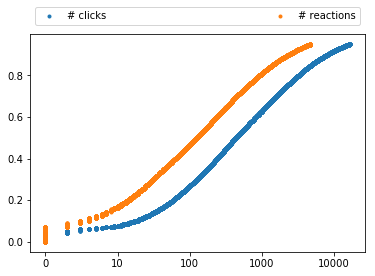

In [144]:
import numpy as np
import math
import matplotlib.pyplot as plt

data = list(bitly_dataframe['clicks'])
sorted_data = np.sort(data)
sorted_data = [np.log10(x+1) for x in sorted_data]
yvals=np.arange(len(sorted_data[0:24148]))/float(len(sorted_data)-1)
p1 = plt.plot(sorted_data[0:24148], yvals, marker='.', linestyle= 'none', label="# clicks")
#plt.xlabel('No. of clicks')

data2 = list(bitly_dataframe['num_reactions'])
sorted_data2 = np.sort(data2)
sorted_data2 = [np.log10(x+1) for x in sorted_data2]
yvals2=np.arange(len(sorted_data2[0:24148]))/float(len(sorted_data2)-1)
p2 = plt.plot(sorted_data2[0:24148], yvals2,  marker='.', linestyle= 'none', label="# reactions")

#data3 = list(bitly_dataframe['fan_count'])
#sorted_data3 = np.sort(data3)
#yvals3=np.arange(len(sorted_data3))/float(len(sorted_data3)-1)
#p3 = plt.plot(sorted_data3,yvals3,  marker='.', linestyle= 'none', label="# subscribers")
#plt.legend([p1, p2, p3], ["reactions", "clicks", "subscribers"])
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
       ncol=2, mode="expand", borderaxespad=0.5)
#plt.xlabel('log1')
plt.xticks(range(5),[0,10,100,1000,10000])
plt.show()


In [104]:
clicks_arr = np.array(sorted_data)
p_clicks = np.percentile(clicks_arr, 95) 
p_clicks

16544.499999999993

In [98]:
reactions_arr = np.array(sorted_data2)
p_reactions = np.percentile(reactions_arr, 95) 
p_reactions

4713.0

In [106]:
clicks_95 = []
reactions_95 = []

i_clicks = list(clicks_arr).index(16544)
i_clicks

24148

In [108]:
i_reactions = list(reactions_arr).index(4713)
i_reactions

24148

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

data2 = list(bitly_dataframe['num_reactions'])

sorted_data2 = np.sort(data2)

yvals2=np.arange(len(sorted_data2))/float(len(sorted_data2)-1)

plt.plot(sorted_data2[0:24148] ,yvals2,  marker='.', linestyle= 'none')

plt.xlabel('No. of reactions')
plt.show()

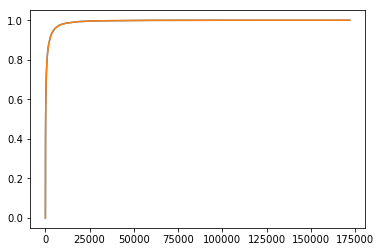

In [36]:
plt.plot(sorted_data, np.linspace(0,1,sorted_data.size))
plt.show()

In [130]:
clicks_groupby_page = bitly_dataframe['clicks'].groupby(bitly_dataframe['page_name'])

In [131]:
fancount_groupby_page = bitly_dataframe['fan_count'].groupby(bitly_dataframe['page_name'])

In [140]:
reactions_grouby_page = bitly_dataframe['num_reactions'].groupby(bitly_dataframe['page_name'])

In [ ]:
mean_click_per_page = clicks_groupby_page.mean()

In [133]:
median_clicks_per_page = clicks_groupby_page.median()

In [ ]:
np.mean(clicks_groupby_page.median() / fan_count_per_page)

In [135]:
len(mean_click_per_page)

216

In [136]:
fan_count_per_page = fancount_groupby_page.mean()

In [137]:
len(fan_count_per_page)

216

In [138]:
mean_clicks_per_subscribers = mean_click_per_page/fan_count_per_page


In [86]:
median_clicks_per_subscribers = median_clicks_per_page/fan_count_per_page

In [ ]:
mean_clicks_per_subscribers

In [106]:
max(mean_clicks_per_subscribers)

51.109523809523807

In [105]:
np.median(mean_clicks_per_subscribers)

0.0048643870960598211

In [88]:
np.median(median_clicks_per_subscribers)

0.0026325383363770961

In [91]:
np.mean(median_clicks_per_subscribers)

0.2924418464030654

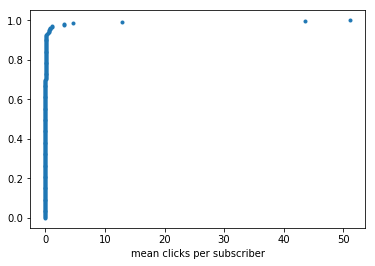

In [104]:
import numpy as np

import matplotlib.pyplot as plt

data3 = list(mean_clicks_per_subscribers)

sorted_data3 = np.sort(data3)

yvals3=np.arange(len(sorted_data3))/float(len(sorted_data3)-1)

plt.plot(sorted_data3, yvals3,  marker='.', linestyle= 'none')

plt.xlabel('mean clicks per subscriber')
plt.show()

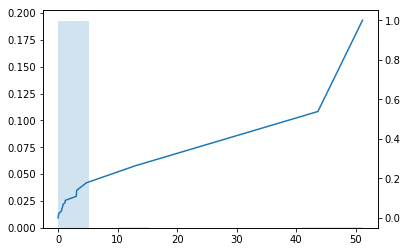